## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import random 
import seaborn as sn 
import matplotlib.pyplot as plt  


In [2]:
dataset = pd.read_csv('new_churn_data.csv') 

## Data Preparation 

In [3]:
user_identifier = dataset['user'] 
dataset = dataset.drop(columns = ['user']) 

##  One-Hot Encoding 

In [4]:
dataset.housing.value_counts() 
dataset.groupby('housing')['churn'].nunique().reset_index() 
dataset = pd.get_dummies(dataset) 
dataset.columns 
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na']) 

# Splitting the dataset into the Training set and Test set 


In [5]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'], 
                                                    test_size = 0.2, 
                                                    random_state = 0) 

# Balancing the Training Set 

In [6]:
# Balancing the Training Set 
y_train.value_counts()  
pos_index = y_train[y_train.values == 1].index 
neg_index = y_train[y_train.values == 0].index  
if len(pos_index) > len(neg_index): 
    higher = pos_index 
    lower = neg_index 
else: 
    higher = neg_index 
    lower = pos_index  
random.seed(0) 
higher = np.random.choice(higher, size=len(lower)) 
lower = np.asarray(lower) 
new_indexes = np.concatenate((lower, higher))  
X_train = X_train.loc[new_indexes,] 
y_train = y_train[new_indexes]

# Feature Scaling 


In [7]:

from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train)) 
X_test2 = pd.DataFrame(sc_X.transform(X_test)) 
X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values 
X_train2.index = X_train.index.values 
X_test2.index = X_test.index.values 
X_train = X_train2 
X_test = X_test2

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Model Building 

# Fitting Model to the Training Set 


In [8]:

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Predicting Test Set 
y_pred = classifier.predict(X_test)


# Evaluating Results 


Test Data Accuracy: 0.6467


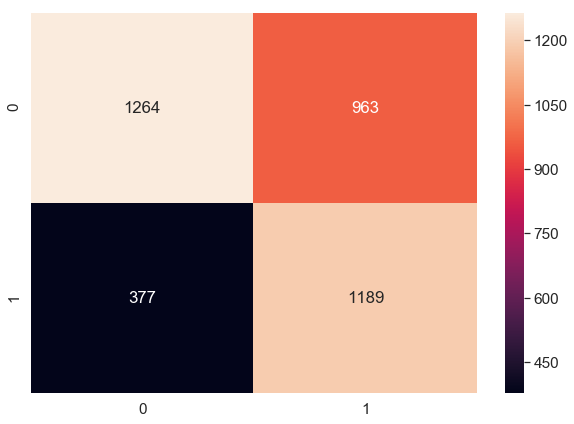

In [11]:
# Evaluating Results 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred) 
accuracy_score(y_test, y_pred) 
precision_score(y_test, y_pred) # tp / (tp + fp) 
recall_score(y_test, y_pred) # tp / (tp + fn) 
f1_score(y_test, y_pred)  
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1)) 
plt.figure(figsize = (10,7)) 
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, fmt='g') 
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# Applying k-Fold Cross Validation 


In [12]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

SVM Accuracy: 0.654 (+/- 0.032)


In [13]:
# Analyzing Coefficients 
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]), 
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"]) 
           ],axis = 1)

,features,coef
0,age,-0.205469
1,deposits,0.144033
2,withdrawal,0.014498
3,purchases_partners,-0.729049
4,purchases,-0.246226
5,cc_taken,0.092864
6,cc_recommended,0.004277
7,cc_disliked,-0.022883
8,cc_liked,-0.012623
9,cc_application_begin,0.075822


## Feature Selection


In [14]:
# Recursive Feature Elimination 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

# Model to Test 

In [15]:
# Model to Test 
classifier = LogisticRegression() 
# Select Best X Features 
rfe = RFE(classifier, 20) 
rfe = rfe.fit(X_train, y_train) 
# summarize the selection of the attributes 
print(rfe.support_) 
print(rfe.ranking_) 
X_train.columns[rfe.support_] 

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

[ True  True False  True  True  True False False False  True  True  True
  True False  True False  True  True  True False  True  True  True False
  True False False False  True  True False False  True False False False
 False False False False False]
[ 1  1 10  1  1  1 21  6 20  1  1  1  1 22  1  7  1  1  1  9  1  1  1  3
  1  4  8  5  1  1 13 11  1 18 16 17  2 14 19 15 12]


Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_R',
       'payment_type_Weekly', 'zodiac_sign_Aquarius', 'zodiac_sign_Capricorn'],
      dtype='object')

# New Correlation Matrix 


In [16]:
# New Correlation Matrix 
sn.set(style="white") 
 
# Compute the correlation matrix 
corr = X_train[X_train.columns[rfe.support_]].corr()  
# Generate a mask for the upper triangle 
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

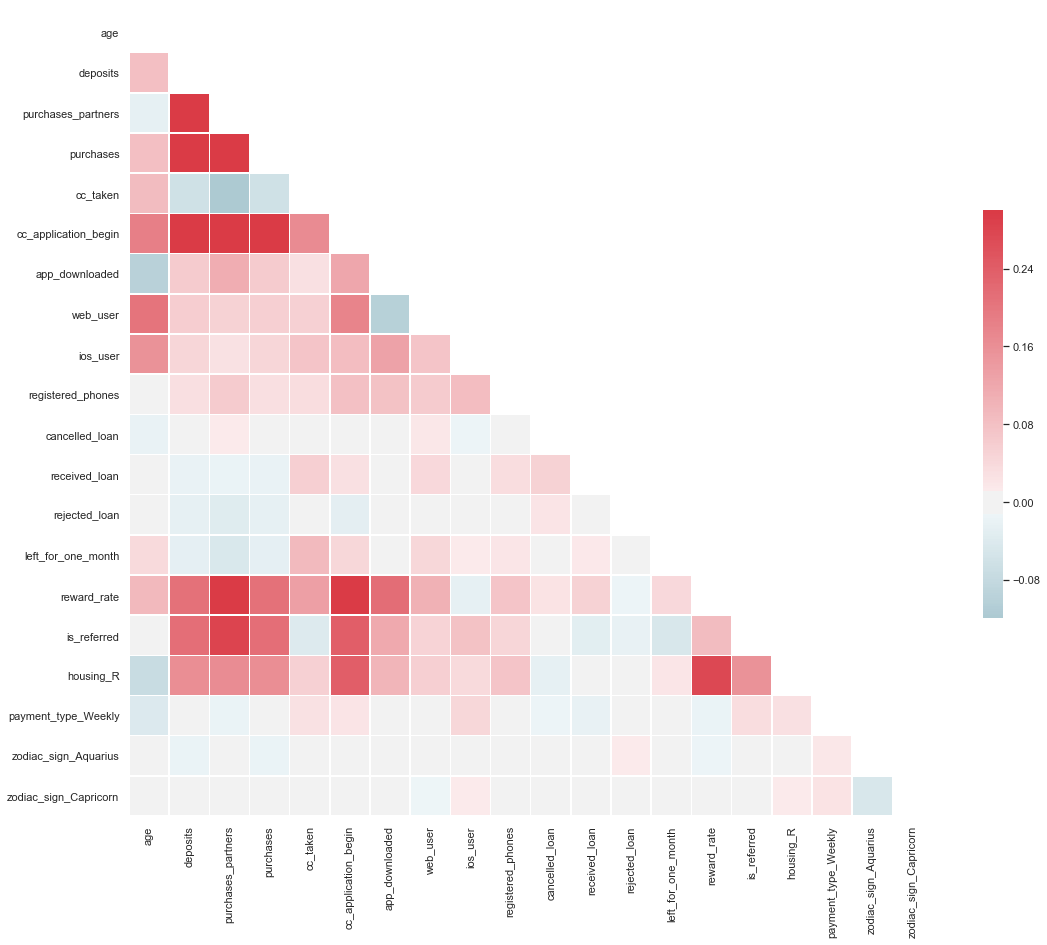

In [17]:
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(18, 15))  
# Generate a custom diverging colormap 
cmap = sn.diverging_palette(220, 10, as_cmap=True)  
# Draw the heatmap with the mask and correct aspect ratio 
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

# Fitting Model to the Training Set 

In [18]:
# Fitting Model to the Training Set 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression() 
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train) 

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Test Data Accuracy: 0.6486


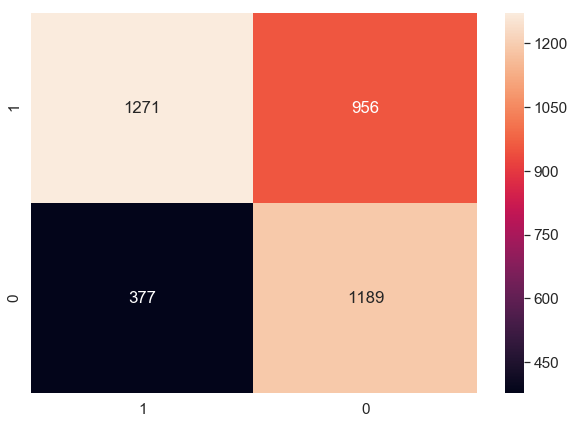

In [19]:
# Predicting Test Set 
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])  
# Evaluating Results 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score 
cm = confusion_matrix(y_test, y_pred) 
accuracy_score(y_test, y_pred) 
precision_score(y_test, y_pred) # tp / (tp + fp) 
recall_score(y_test, y_pred) # tp / (tp + fn) 
f1_score(y_test, y_pred)  
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0)) 
plt.figure(figsize = (10,7)) 
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, fmt='g') 
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [22]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train[X_train.columns[rfe.support_]], 
                             y = y_train, cv = 10) 
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2)) 

C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

SVM Accuracy: 0.656 (+/- 0.030)


C:\Users\Manir Uddin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
# Analyzing Coefficients 
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]), 
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"]) 
           ],axis = 1) 

,features,coef
0,age,-0.203543
1,deposits,0.158088
2,purchases_partners,-0.716875
3,purchases,-0.252812
4,cc_taken,0.086644
5,cc_application_begin,0.071180
6,app_downloaded,-0.058076
7,web_user,0.112532
8,ios_user,0.071185
9,registered_phones,0.069194


## End of Model ####   

In [21]:
# Formatting Final Results 
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna() 
final_results['predicted_churn'] = y_pred 
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True) 